# Data Visualization: Waffle Charts, Word Clouds, and Regression Plots

<h3>Table of Contents</h3>

<div style="margin-top: 20px">
<ol>
    <li><a href="#Waffle">Waffle Charts</a></li>
    <li><a href="#Words">Word Clouds</a></li>
    <li><a href="#Regression">Regression Plots</a></li>
</ol>
</div>

Import libraries: 

In [1]:
# install libraries
#%pip instal pandas
#%pip install numpy

In [2]:
import pandas as pd
import numpy as np

Load the data and store it in dataframe `df`:


In [3]:
path='data/04_exploration_automovile.csv'
df = pd.read_csv(path)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


In [4]:
# %pip install matplotlib

In [5]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

<h2 id="Waffle">1. Waffle Charts</h2>

In [6]:
# %pip install pywaffle

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

In [7]:
# group cars by body-style and apply value_counts() function 
df_body = df.groupby(['body-style'])['body-style'].value_counts().reset_index()
df_body = df_body.rename({'body-style': 'Body styles', 'count': 'Number of cars'}, axis=1)
df_body = df_body.set_index(['Body styles'])
df_body

,Number of cars
Body styles,
convertible,6
hardtop,8
hatchback,68
sedan,94
wagon,25


In [8]:
list(df_body.index)

['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']

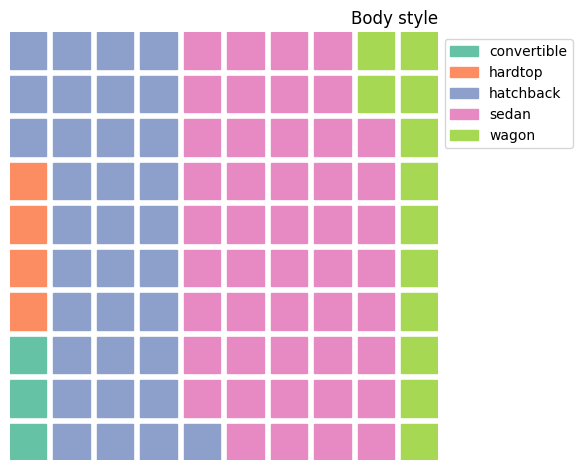

In [9]:
from pywaffle import Waffle

# Waffle chart
plt.figure(
    FigureClass = Waffle,
    rows = 10,
    columns = 10,
    values = df_body['Number of cars'],
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'labels': list(df_body.index)},
    title = {"label": "Body style", "loc": "right", "size": 12})

plt.show()

<h2 id="Words">2. Word Clouds</h2>

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**. You can learn more about the package by following this [link](https://github.com/amueller/word_cloud/).

Let's use this package to learn how to generate a word cloud for a given text document.


First, let's install the package.


In [10]:
# install wordcloud
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


`Word` clouds are commonly used to perform high-level analysis and visualization of text data. 

Let's try to analyze a short novel written by **Lewis Carroll** titled *Alice's Adventures in Wonderland*. Let's go ahead and download a _.txt_ file of the novel.

In [12]:
with open('data/alice_novel.txt', 'r', encoding='utf-8') as f:
    alice_novel = f.read()  

alice_novel[:1000]

"\ufeffProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice's Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, 'and what is

Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.


In [13]:
stopwords = set(STOPWORDS)

list(stopwords)[:20]

['further',
 "mustn't",
 'up',
 'or',
 'after',
 'each',
 'are',
 'his',
 "shouldn't",
 'down',
 'so',
 'ours',
 'its',
 'my',
 "hasn't",
 'as',
 'out',
 'until',
 'he',
 'here']

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.


In [14]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

Awesome! Now that the `word` cloud is created, let's visualize it.


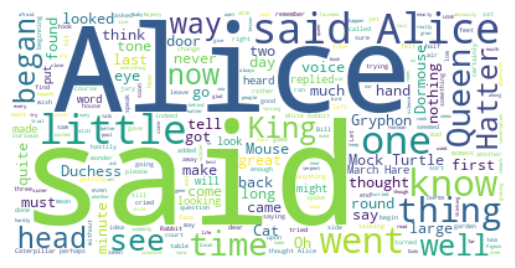

In [15]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.


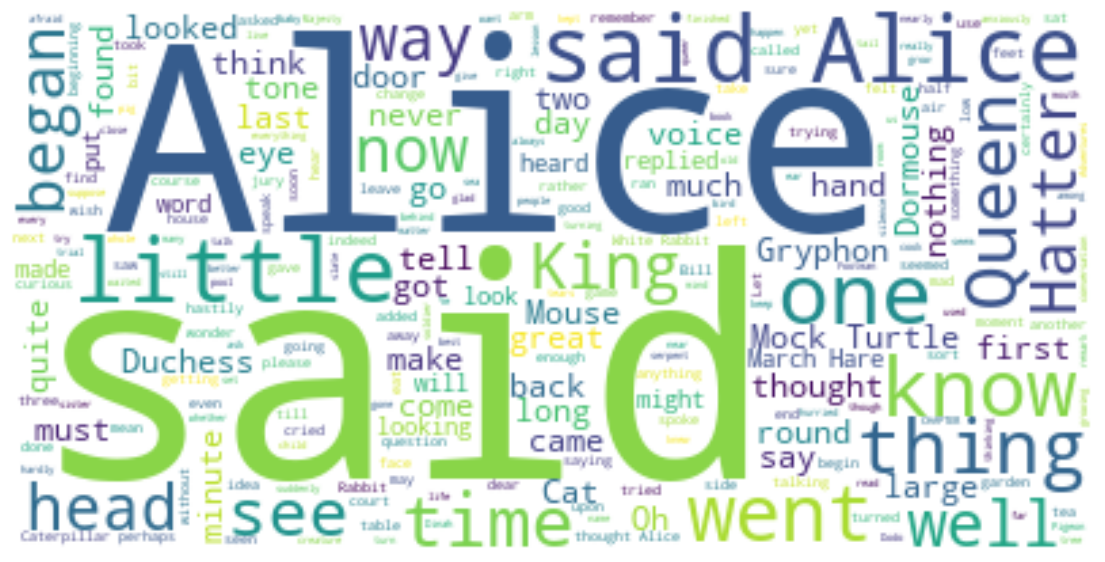

In [16]:
fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.


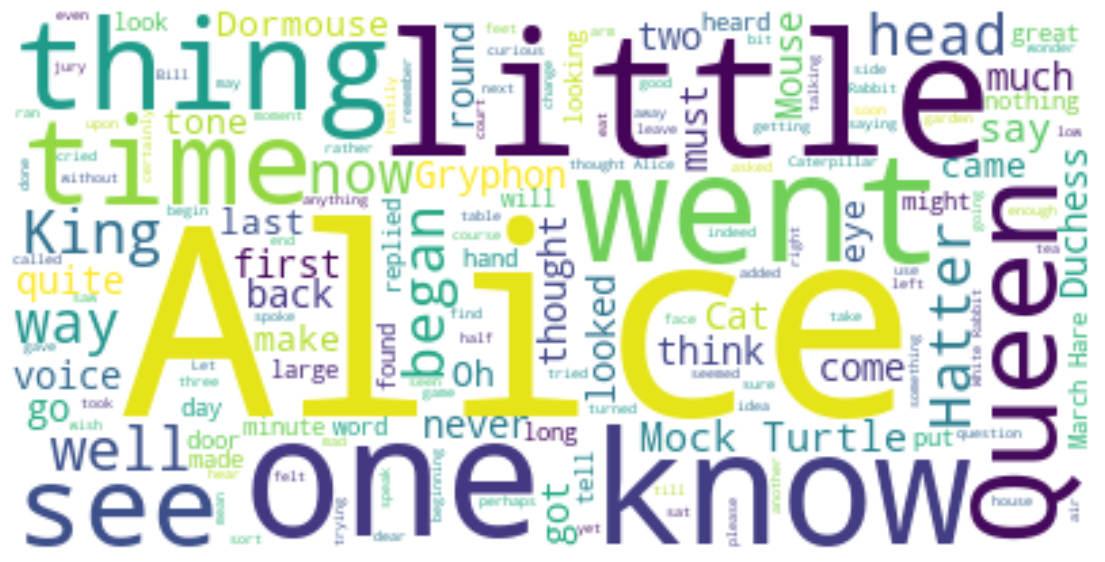

In [17]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


In [19]:
word_string = ' '.join(word for word in df['make'].values)
word_string

'alfa-romero alfa-romero alfa-romero audi audi audi audi audi audi bmw bmw bmw bmw bmw bmw bmw bmw chevrolet chevrolet chevrolet dodge dodge dodge dodge dodge dodge dodge dodge dodge honda honda honda honda honda honda honda honda honda honda honda honda honda isuzu isuzu jaguar jaguar jaguar mazda mazda mazda mazda mazda mazda mazda mazda mazda mazda mazda mazda mazda mazda mazda mazda mazda mercedes-benz mercedes-benz mercedes-benz mercedes-benz mercedes-benz mercedes-benz mercedes-benz mercedes-benz mercury mitsubishi mitsubishi mitsubishi mitsubishi mitsubishi mitsubishi mitsubishi mitsubishi mitsubishi mitsubishi mitsubishi mitsubishi mitsubishi nissan nissan nissan nissan nissan nissan nissan nissan nissan nissan nissan nissan nissan nissan nissan nissan nissan nissan peugot peugot peugot peugot peugot peugot peugot peugot peugot peugot peugot plymouth plymouth plymouth plymouth plymouth plymouth plymouth porsche porsche porsche porsche renault renault saab saab saab saab saab sa

In [20]:
len(set(word_string))

26

In [21]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


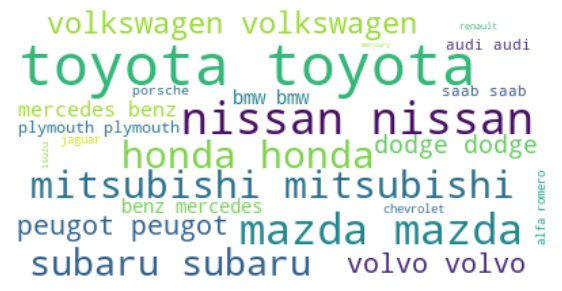

In [22]:
# display the cloud
plt.figure(figsize=(7, 9))

plt.imshow(wordcloud, interpolation='bilinear')

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

plt.axis('off')
plt.show()

<h2 id="Regression">3. Regression Plots</h2>


> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork970-2023-01-01).

In lab *Pie Charts, Box Plots, Scatter Plots, and Bubble Plots*, we learned how to create a scatter plot and then fit a regression line. It took ~20 lines of code to create the scatter plot along with the regression fit. In this final section, we will explore *seaborn* and see how efficient it is to create regression lines and fits using this library!

Let's first install *seaborn*


In [23]:
# %pip install seaborn

In [24]:
# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [25]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


With *seaborn*, generating a regression plot is as simple as calling the **regplot** function.


<Axes: xlabel='horsepower', ylabel='price'>

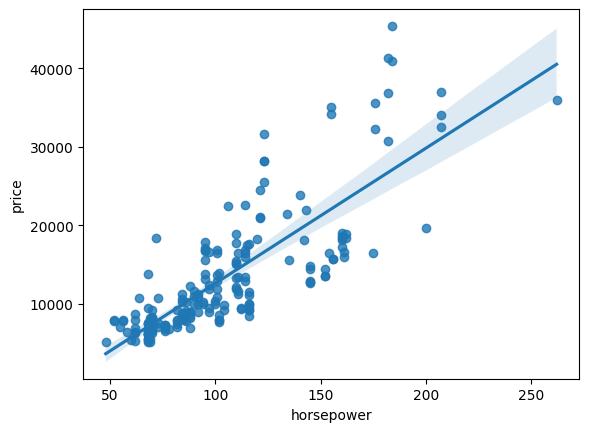

In [26]:
sns.regplot(x='horsepower', y='price', data=df)

You can also customize the color of the scatter plot and regression line. Let's change the color to green.


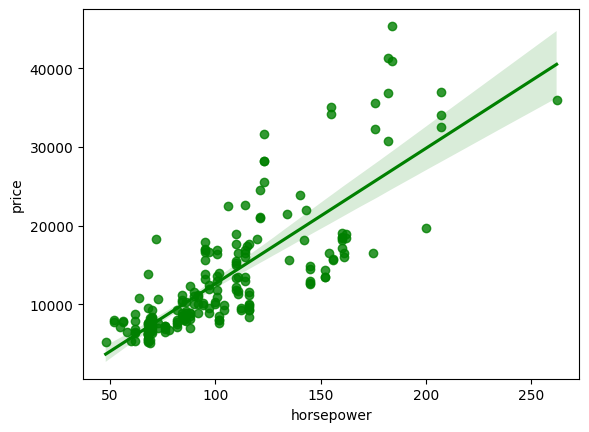

In [27]:
sns.regplot(x='horsepower', y='price', data=df, color='green')
plt.show()

You can always customize the marker shape, so instead of circular markers, let's use `+`.


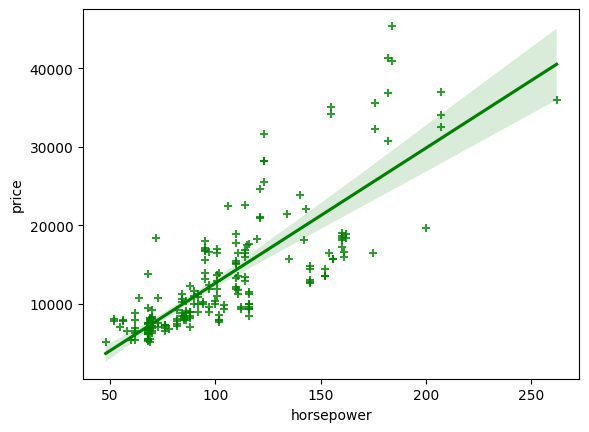

In [28]:
ax = sns.regplot(x='horsepower', y='price', data=df, color='green', marker='+')
plt.show()

Let's blow up the plot a little so that it is more appealing to the sight.


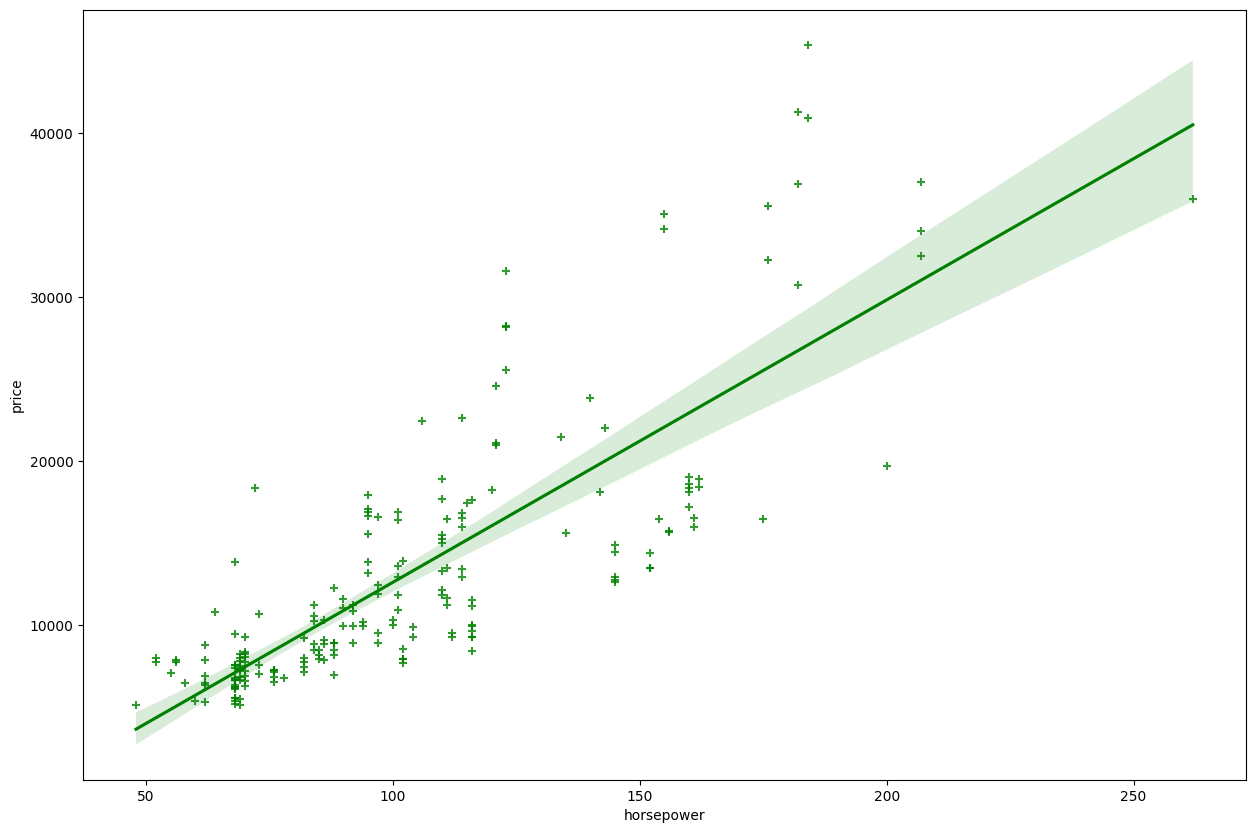

In [29]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='horsepower', y='price', data=df, color='green', marker='+')
plt.show()

And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.


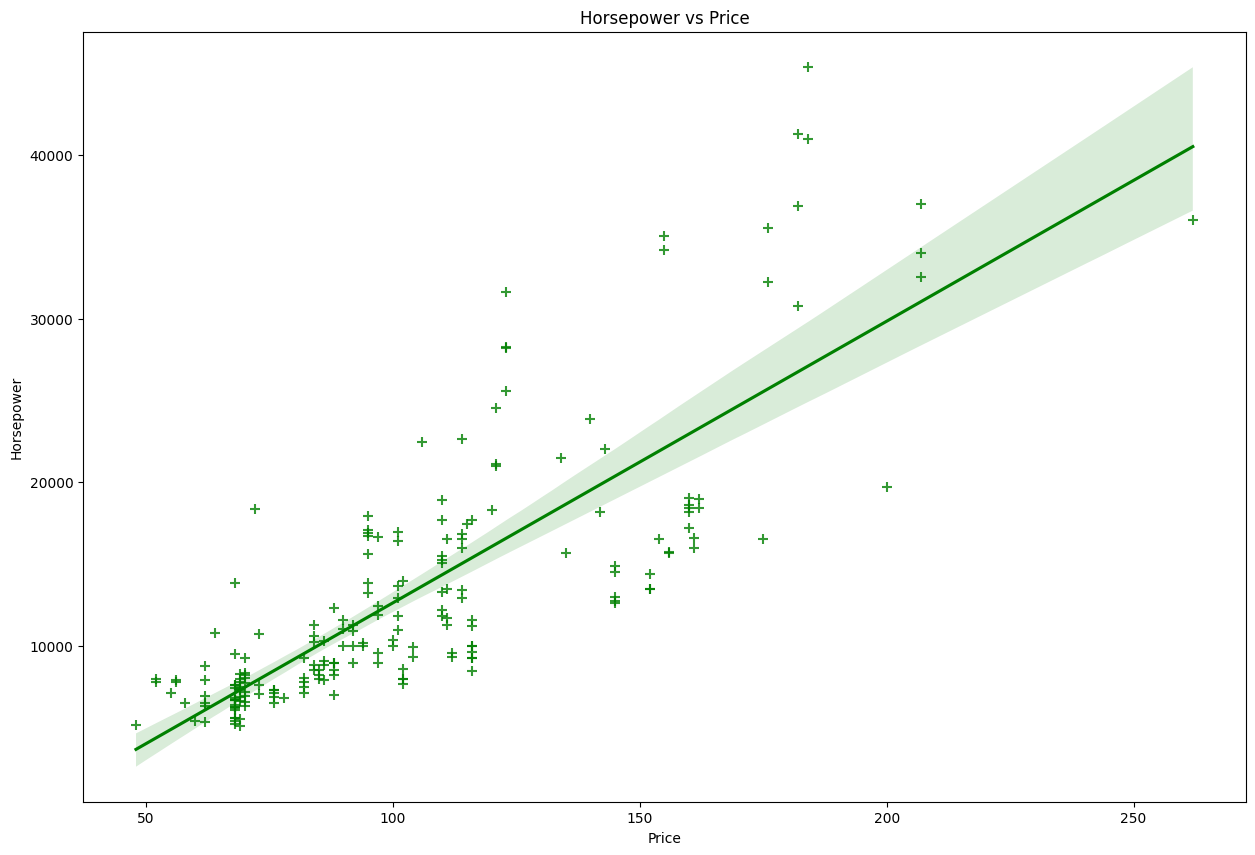

In [30]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='horsepower', y='price', data=df, color='green', marker='+', scatter_kws={'s': 50})

ax.set(xlabel='Price', ylabel='Horsepower') # add x- and y-labels
ax.set_title('Horsepower vs Price') # add title
plt.show()

And finally increase the font size of the tickmark labels, the title, and the x- and y-labels so they don't feel left out!


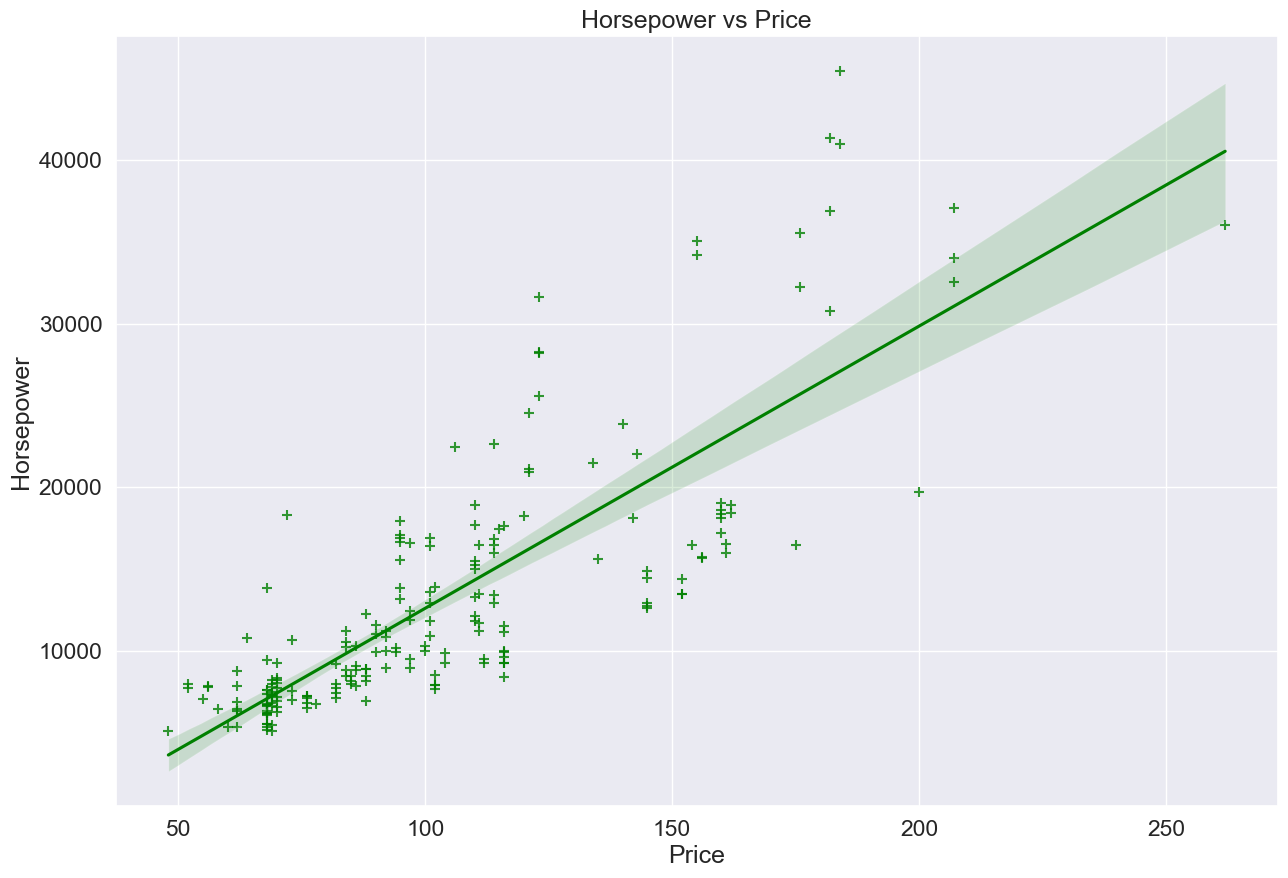

In [31]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='horsepower', y='price', data=df, color='green', marker='+', scatter_kws={'s': 50})

ax.set(xlabel='Price', ylabel='Horsepower') # add x- and y-labels
ax.set_title('Horsepower vs Price') # add title
plt.show()

You can easily change the style to a white plain background.


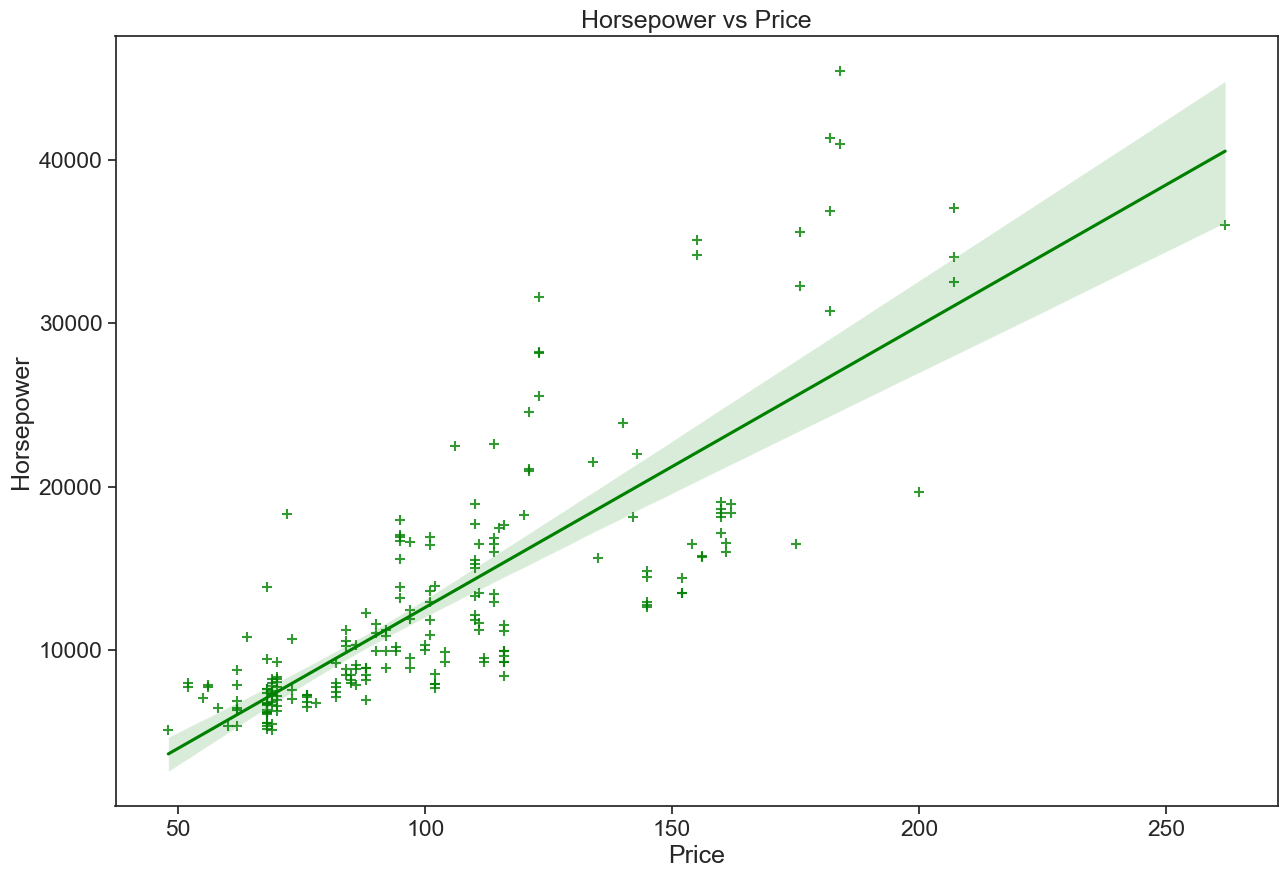

In [32]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='horsepower', y='price', data=df, color='green', marker='+', scatter_kws={'s': 50})

ax.set(xlabel='Price', ylabel='Horsepower') # add x- and y-labels
ax.set_title('Horsepower vs Price') # add title
plt.show()

Or to a white background with gridlines.


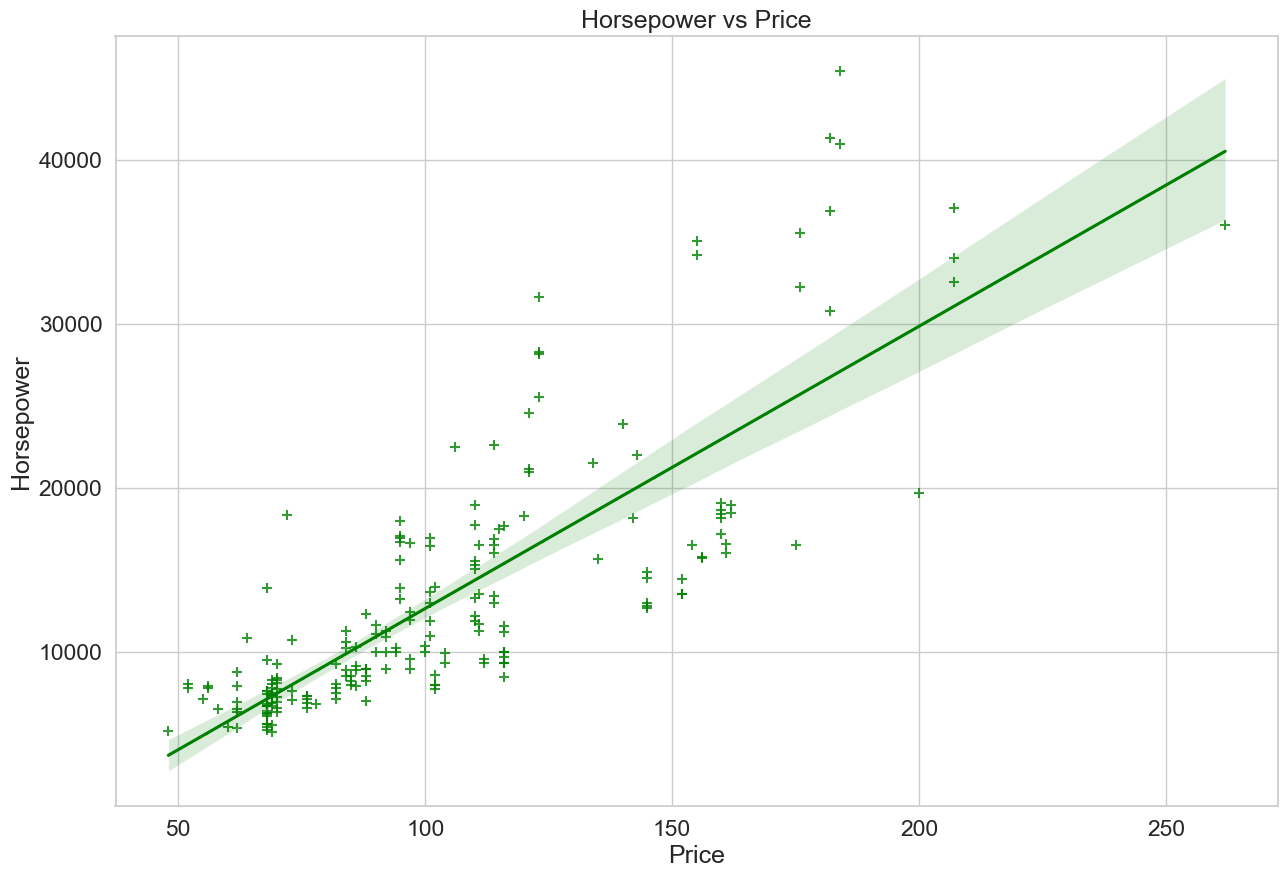

In [33]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='horsepower', y='price', data=df, color='green', marker='+', scatter_kws={'s': 50})

ax.set(xlabel='Price', ylabel='Horsepower') # add x- and y-labels
ax.set_title('Horsepower vs Price') # add title
plt.show()